In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
from CollabFilterOneVectorPerItem import *
from AbstractBaseCollabFilterSGD import *
from train_valid_test_loader import load_train_valid_test_datasets

In [4]:
def parser(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith("epoch"):
                parts = line.split("|")
                epoch_data = [float(part.split()[-1]) for part in parts]
                data.append(epoch_data)

    
    columns = ["epoch", "loss_total", "train_MAE", "valid_MAE", "grad_wrt_mu", "grad_wrt_b_per_user", "grad_wrt_c_per_item", "grad_wrt_U", "grad_wrt_V"]
    df = pd.DataFrame(data, columns=columns)
    
    return df


In [5]:
def plot_mae_v_epoch(df):
    x = df['epoch']
    y_train = df['train_MAE']
    y_valid = df['valid_MAE']
    plt.plot(x, y_train, label='Train MAE')
    plt.plot(x, y_valid, label='Valid MAE')
    plt.xlabel('epoch')
    plt.ylabel('MAE')
    plt.title('MAE vs epoch')
    plt.grid()
    plt.show()

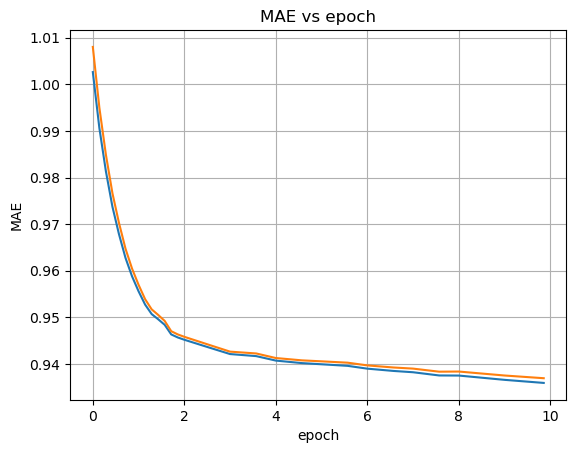

In [10]:
k2_df = parser("output_K2.txt")
plot_mae_v_epoch(k2_df)

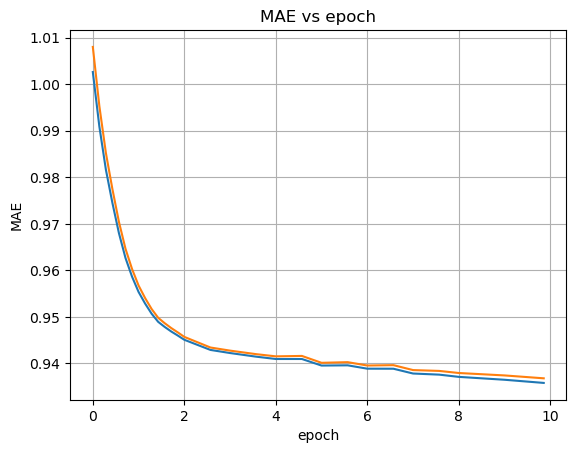

In [11]:
k10_df = parser("output_K10.txt")
plot_mae_v_epoch(k10_df)

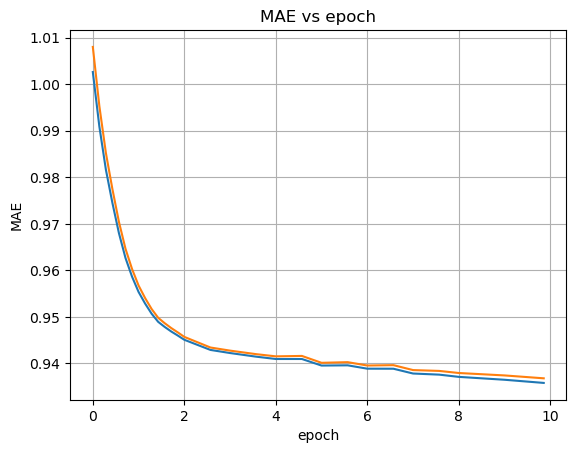

In [12]:
k50_df = parser("output_K10.txt")
plot_mae_v_epoch(k50_df)

In [17]:
import itertools

alpha = [0.001, 0.01, 0.1, 1, 10, 100]
batch_size = [50, 100, 500, 1000, 5000, 50000]
step_size = [0.001, 0.01, 0.1, 1, 10, 100]
combination = list(itertools.product(alpha, batch_size, step_size))

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

def callCombinations(currMin, bestIndex):
    n = len(combination)
    for index in range(n):
        print("trial ", index + 1)
        print("currMin ", currMin)
        a, b, s = combination[index]
        model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 50, alpha=a)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple)
        minValid = min(model.trace_mae_valid)
        if currMin > minValid:
            currMin = minValid
            bestIndex = index
        print("new currMin ", currMin)
    return currMin, bestIndex

currMin, bestIndex = callCombinations(float("inf"), 0)

KeyboardInterrupt: 

In [12]:
import sys
from contextlib import redirect_stdout

# a, b, s = combination[bestIndex]
a, b, s = (0.001, 50, 0.1)

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()
model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 50, alpha=a)
model.init_parameter_dict(n_users, n_items, train_tuple)

with open("partB_output.txt", "w") as f:
    with redirect_stdout(f):
        model.fit(train_tuple, valid_tuple)

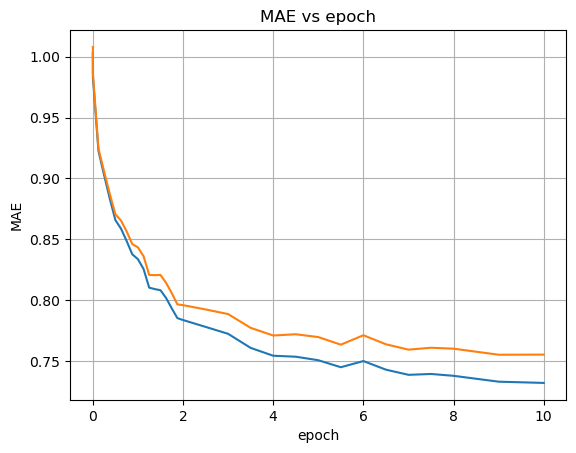

In [14]:
kB_df = parser("partB_output.txt")
plot_mae_v_epoch(kB_df)

#### Part C

In [16]:
import itertools

alpha = [0.001, 0.01, 0.1, 1, 10, 100]
batch_size = [50, 100, 500, 1000, 5000, 50000]
step_size = [0.001, 0.01, 0.1, 1, 10, 100]
combination = list(itertools.product(alpha, batch_size, step_size))

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

def callCombinations(currMin, bestIndex):
    n = len(combination)
    for index in range(n):
        print("trial ", index + 1)
        print("currMin ", currMin)
        a, b, s = combination[index]
        model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 2, alpha=a)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple)
        minValid = min(model.trace_mae_valid)
        if currMin > minValid:
            currMin = minValid
            bestIndex = index
        print("new currMin ", currMin)
    return currMin, bestIndex

currMin, bestIndex = callCombinations(float("inf"), 0)

a, b, s = combination[bestIndex]

print(a, b, s)

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()
model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 2, alpha=a)
model.init_parameter_dict(n_users, n_items, train_tuple)

with open("partC_K2_output.txt", "w") as f:
    sys.stdout = f
    model.fit(train_tuple, valid_tuple)
    sys.stdout = sys.__stdout__

/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:34: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: x * g))
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:33: RuntimeWarning: overflow encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),
/Users/brandonmukadziwashe/CS135/cs135-24f-assignments/CS-135-Project-B/AbstractBaseCollabFilterSGD.py:225: RuntimeWarning: invalid value encountered in subtract
  arr[:] = arr - self.step_size * grad_dict[key]
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered 

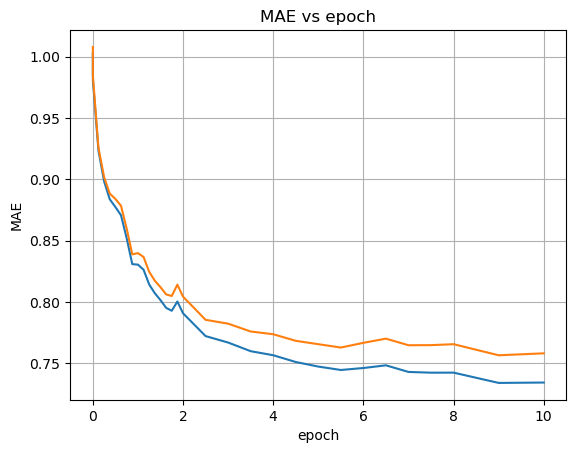

In [17]:
kB_df = parser("partC_K2_output.txt")
plot_mae_v_epoch(kB_df)

In [18]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
batch_size = [50, 100, 500, 1000, 5000, 50000]
step_size = [0.001, 0.01, 0.1, 1, 10, 100]
combination = list(itertools.product(alpha, batch_size, step_size))

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

def callCombinations(currMin, bestIndex):
    n = len(combination)
    for index in range(n):
        print("trial ", index + 1)
        print("currMin ", currMin)
        a, b, s = combination[index]
        model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 10, alpha=a)
        model.init_parameter_dict(n_users, n_items, train_tuple)
        model.fit(train_tuple, valid_tuple)
        minValid = min(model.trace_mae_valid)
        if currMin > minValid:
            currMin = minValid
            bestIndex = index
        print("new currMin ", currMin)
    return currMin, bestIndex

currMin, bestIndex = callCombinations(float("inf"), 0)

a, b, s = combination[bestIndex]

print(a, b, s)

train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()
model = CollabFilterOneVectorPerItem(n_epochs=10, batch_size=b, step_size=s, n_factors = 10, alpha=a)
model.init_parameter_dict(n_users, n_items, train_tuple)

with open("partC_K10_output.txt", "w") as f:
    sys.stdout = f
    model.fit(train_tuple, valid_tuple)
    sys.stdout = sys.__stdout__

/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in power
  return f_raw(*args, **kwargs)
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:33: RuntimeWarning: overflow encountered in multiply
  defvjp(anp.multiply,    lambda ans, x, y : unbroadcast_f(x, lambda g: y * g),
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/autograd/numpy/numpy_vjps.py:34: RuntimeWarning: overflow encountered in multiply
  lambda ans, x, y : unbroadcast_f(y, lambda g: x * g))
/Users/brandonmukadziwashe/CS135/cs135-24f-assignments/CS-135-Project-B/AbstractBaseCollabFilterSGD.py:225: RuntimeWarning: invalid value encountered in subtract
  arr[:] = arr - self.step_size * grad_dict[key]
/Users/brandonmukadziwashe/micromamba/envs/cs135_env/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: invalid value 

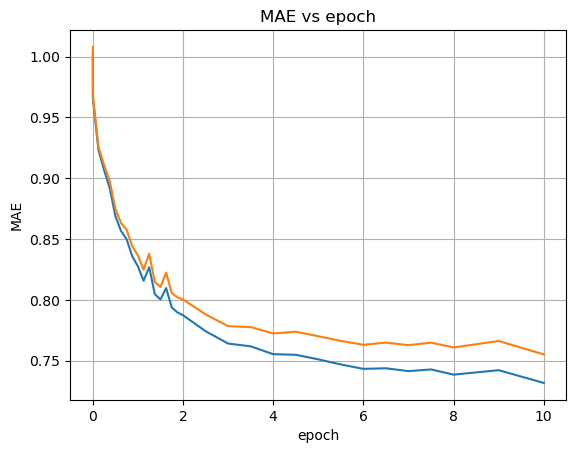

In [19]:
kB_df = parser("partC_K10_output.txt")
plot_mae_v_epoch(kB_df)